# Part 2


We have learned about the [MedMNIST](https://medmnist.com/) data repository and we have used some simple code to load and analyze the available datasets. What if there was a specific package that allows us to load those datasets in a faster way?

THE POWER OF OPEN SOURCE! The people behind MedMNIST not only gathered different medical datasets but also created their own pip package on top of Pytorch to make it easier for users to load and access their project.

Massive thanks to the MedMNIST team for developing this project!

  **Jiancheng Yang, Rui Shi, Donglai Wei, Zequan Liu, Lin Zhao, Bilian Ke, Hanspeter Pfister, Bingbing Ni. Yang, Jiancheng, et al. "MedMNIST v2-A large-scale lightweight benchmark for 2D and 3D biomedical image classification." Scientific Data, 2023.**
                            
  **Jiancheng Yang, Rui Shi, Bingbing Ni. "MedMNIST Classification Decathlon: A Lightweight AutoML Benchmark for Medical Image Analysis". IEEE 18th International Symposium on Biomedical Imaging (ISBI), 2021.**

In [ ]:
import os
os.chdir('drive/MyDrive/Colab Notebooks')
!pwd

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pip install --quiet medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


We will now be use the medmnist pip package so that in the 3rd part of our tutorial we load and train a ResNet architecture with one the available datasets from MedMNIST

# Imports

In [ ]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision

import medmnist
from medmnist import INFO, Evaluator

In [ ]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.2.2 @ https://github.com/MedMNIST/MedMNIST/


In [ ]:
# TODO: Uncomment the following to display an extensive and comprehensive guide for the pip MedMNIST library
# INFO

# First we will do the same process as in Part 1, but now, we will use the open-source package that helps us interact with the MedMNIST datasets in an easier and faster way
---



In [ ]:
data_flag = 'pathmnist'
# TODO: You can choose any of the dataset string names that we can find in the INFO directive
download = True

# Here we set some hyperparameters
NUM_EPOCHS = 3
BATCH_SIZE = 5
lr = 0.001

# TODO: Let's understand what is happening in the lines below...
info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])
DataClass = getattr(medmnist, info['python_class'])


# The important thing to notice, is that there will always be more than one single way
# to access and manage a dataset. You can develop your own code/solution or re-take
# something someone else has already built. Remember: you do not have to re-invent the wheel!

In [ ]:
# TODO: Let's find out what kind of meta data our dataset comes with
# 1. Print out the information regarding the number of samples
# 2. Print the labels/classes this dataset contains
# Which variable contains all this information?

{'python_class': 'PathMNIST',
 'description': 'The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.',
 'url': 'https://zenodo.org/record/6496656/files/pathmnist.npz?download=1',
 'MD5': 'a8b06965200029087d5bd730944a56c1',
 'task': 'multi-class',
 'label': {'0': 'adipose',
  '1': 'background',
  '2': 'debris',
  '3': 'lymphocytes',
  '4': 'mucus',
  '5': 'smooth muscle',
  '6': 'normal colon mucosa',
  '7': 'cancer-associated stroma',
  '8': '

In [ ]:
# TODO
# 1. Apply different transforms to your dataset splits
# 2. Define the folder to which the datasets will be saved to
# DATASET_PATH = ...
# You can reuse code you used in Part 1 in particular for the transformations


data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# TODO Loading of our data splits
# 1. Load the train, test and validation splits from your dataset
# This can be done in 3 lines of code, consider looking at the documentation :)

# Encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: data/pathmnist.npz
Using downloaded and verified file: data/pathmnist.npz
Using downloaded and verified file: data/pathmnist.npz


In [ ]:
# Print out the datasets
# print(train_dataset)
# print("===================")
# print(test_dataset)

# Dataset visualization


In [ ]:
# visualization
train_dataset.montage(length=1)

/usr/local/lib/python3.10/dist-packages/medmnist/utils.py:31: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


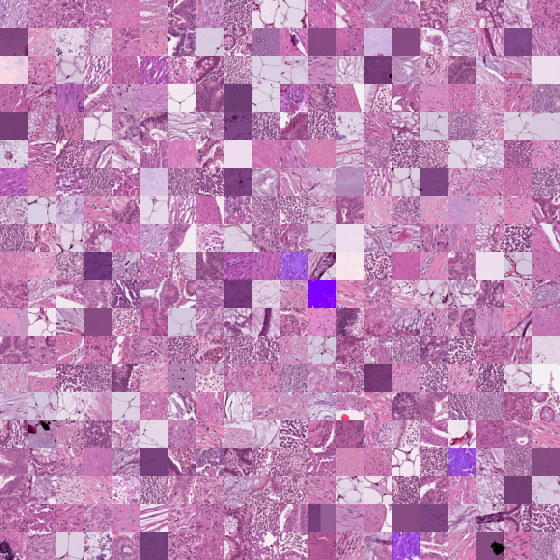

In [ ]:
# montage
train_dataset.montage(length=20)

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = np.clip(inp, 0, 1)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


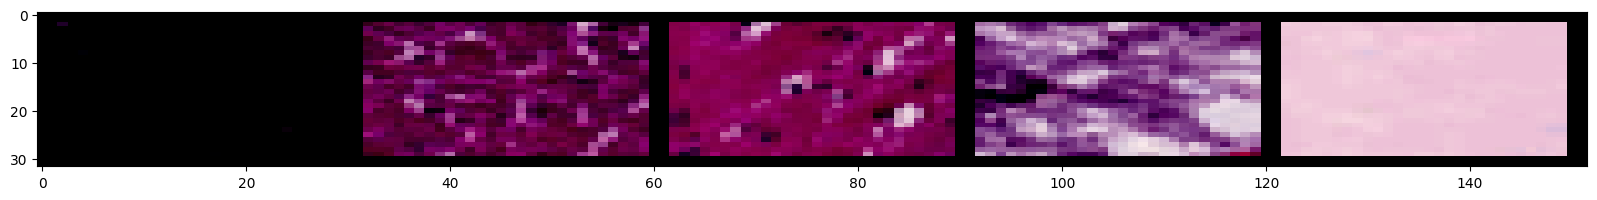

In [ ]:
# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])
imshow(out)

# Now let's define a simple model for training

In [ ]:
# Definition of a simple CNN model

# TODO: I encourage you to play around with the layers and parameters
# of this model. Add, delete, change the non-linearity functions. This colab
# notebook is your canvas!

class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = Net(in_channels=n_channels, num_classes=n_classes)

# define loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [ ]:
# Training loop

# TODO
# 1. Add a bit more information to the progress bar
# Information regarding the loss and accuracy could be helpful to have a more
# interactive training loop


for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    model.train()
    for inputs, targets in tqdm(train_loader):
        # Steps for forward + backward + optimize
        optimizer.zero_grad()
        outputs = model(inputs)

        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()
